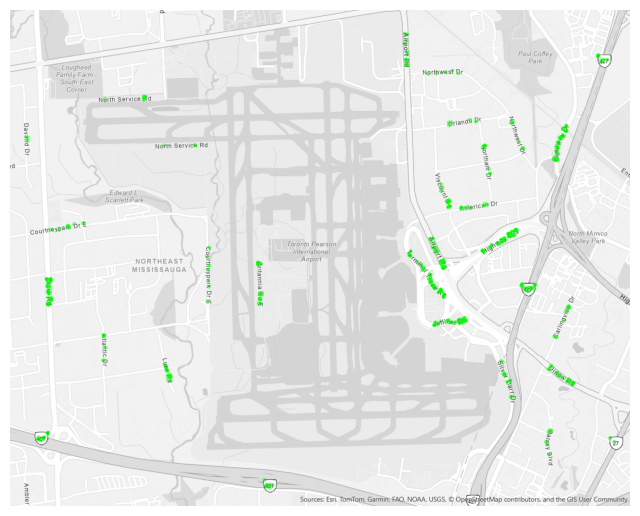

Number of keypoints detected: 500
Descriptor shape: (500, 32)


In [181]:
import cv2
import matplotlib.pyplot as plt

file_path = "C:/Users/twool/Downloads/TIFF GTAA Georeferenced/TIFF GTAA Georeferenced/navigation.tif"
# Load the image
img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

# Create ORB object
orb = cv2.ORB_create()

# Detect keypoints and compute descriptors
keypoints, descriptors = orb.detectAndCompute(img, None)

# Draw keypoints on the image
img_with_keypoints = cv2.drawKeypoints(img, keypoints, None, color=(0, 255, 0))

# Display the image with keypoints
plt.figure(figsize=(8, 8))
plt.imshow(img_with_keypoints, cmap='gray')
plt.axis('off')
plt.show()

# Print keypoints and descriptors
print(f"Number of keypoints detected: {len(keypoints)}")
print(f"Descriptor shape: {descriptors.shape}")

Number of contours found: 1661


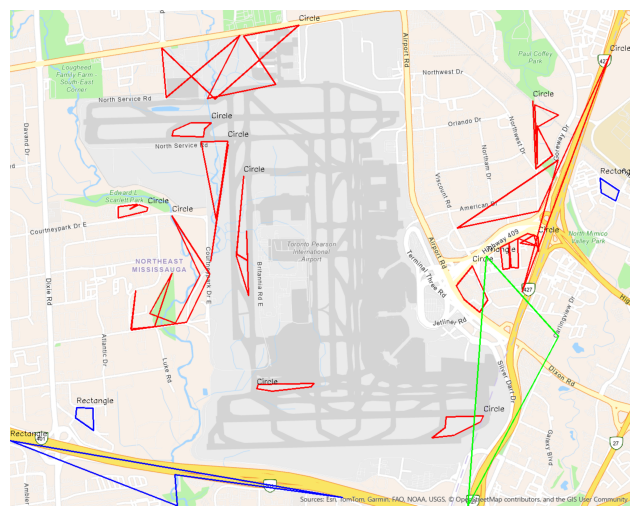

In [182]:
import cv2
import numpy as np
import matplotlib.pyplot as plt  # Import for display

# Load an image
file_path = r"C:/Users/twool/Downloads/TIFF GTAA Georeferenced/TIFF GTAA Georeferenced/navigation.tif"  # Ensure correct file path
img = cv2.imread(file_path)

if img is None:
    raise ValueError("Error loading image. Check file path.")

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply edge detection
edges = cv2.Canny(gray, 50, 150)

min_area = 1000

# Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(f"Number of contours found: {len(contours)}")

for contour in contours:
    area = cv2.contourArea(contour)

    if min_area > area:
        continue

    # Approximate the contour to reduce the number of points
    epsilon = 0.02 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)

    # Get the number of vertices (corner points)
    num_vertices = len(approx)

    # Draw the shape based on the number of vertices
    if num_vertices == 3:
        shape_name = "Triangle"
        color = (0, 255, 0)  # Green
    elif num_vertices == 4:
        # Use aspect ratio to distinguish between square and rectangle
        x, y, w, h = cv2.boundingRect(approx)
        aspect_ratio = w / float(h)
        shape_name = "Square" if 0.95 <= aspect_ratio <= 1.05 else "Rectangle"
        color = (255, 0, 0)  # Blue
    elif num_vertices > 4:
        shape_name = "Circle"
        color = (0, 0, 255)  # Red
    else:
        continue

    cv2.drawContours(img, [approx], 0, color, 2)

    # Label the shape on the image
    x, y = approx[0][0]
    cv2.putText(img, shape_name, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1)

# Convert from BGR to RGB for Matplotlib display
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image using Matplotlib
plt.figure(figsize=(8, 8))
plt.imshow(img_rgb)
plt.axis('off')  # Hide axes
plt.show()

cv2.waitKey(0)
cv2.destroyAllWindows()


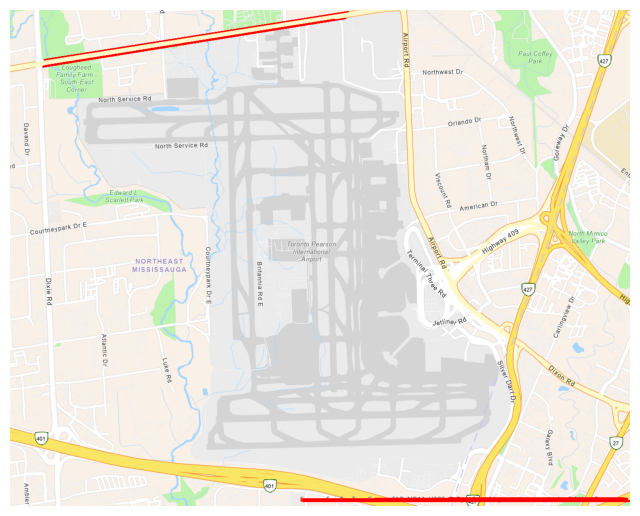

In [183]:
import cv2
import numpy as np
import matplotlib.pyplot as plt  # Import for display

# Load the image
file_path = r"C:/Users/twool/Downloads/TIFF GTAA Georeferenced/TIFF GTAA Georeferenced/navigation.tif"  # Ensure correct file path
img = cv2.imread(file_path)

if img is None:
    raise ValueError("Error loading image. Check file path.")

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply edge detection using Canny
edges = cv2.Canny(gray, 50, 150)

# Detect lines using the Hough Line Transform
# Parameters: image, rho (distance resolution), theta (angle resolution), threshold
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 100, minLineLength=50, maxLineGap=10)

min_line_length = 350

# Draw the detected lines on the original image
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]

        # Calculate the length of the line
        line_length = np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

        # Only draw lines that are longer than the minimum length
        if line_length > min_line_length:
            cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)  # Red line

# Convert from BGR to RGB for Matplotlib display
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image using Matplotlib
plt.figure(figsize=(8, 8))
plt.imshow(img_rgb)
plt.axis('off')  # Hide axes
plt.show()

cv2.waitKey(0)
cv2.destroyAllWindows()


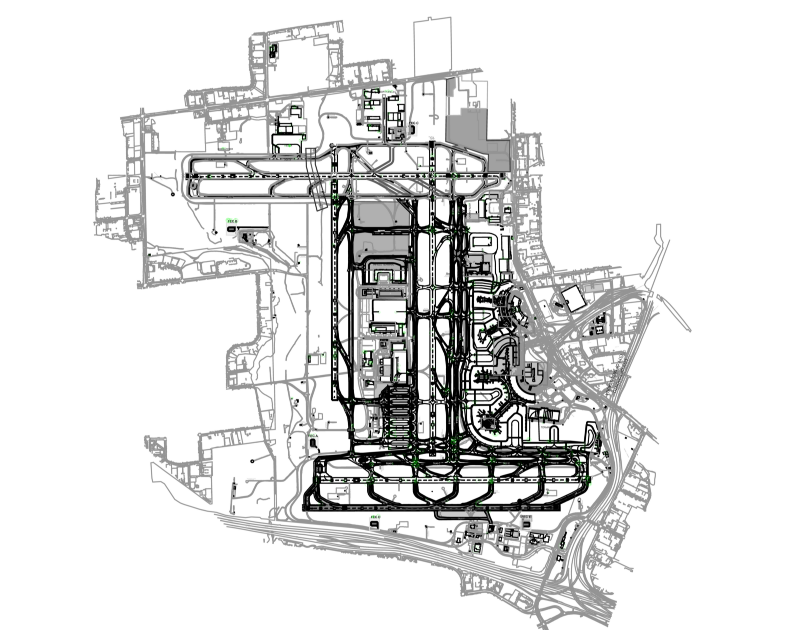

Number of keypoints detected: 500
Descriptor shape: (500, 32)


In [37]:
import cv2
import matplotlib.pyplot as plt

file_path = r"C:\Users\twool\Downloads\GTAA_ungeoreferenced.tif"

# Load the image in grayscale
img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

if img is None:
    raise ValueError("Error loading image. Check file path.")

# Create ORB object
orb = cv2.ORB_create(nfeatures=500)  # Increase number of keypoints if needed

# Detect keypoints and compute descriptors
keypoints, descriptors = orb.detectAndCompute(img, None)

# Check if keypoints are detected
if not keypoints:
    raise ValueError("No keypoints detected. Try adjusting ORB parameters or using a different image.")

# Draw keypoints with rich visualization (shows size and orientation)
img_with_keypoints = cv2.drawKeypoints(
    img, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS, color=(0, 255, 0)
)

# Convert BGR to RGB for correct Matplotlib display
img_rgb = cv2.cvtColor(img_with_keypoints, cv2.COLOR_BGR2RGB)

# Display the image with keypoints
plt.figure(figsize=(10, 15))
plt.imshow(img_rgb)  # No cmap='gray' since we converted to RGB
plt.axis('off')  # Hide axes
plt.show()

# Print keypoints and descriptors
print(f"Number of keypoints detected: {len(keypoints)}")
if descriptors is not None:
    print(f"Descriptor shape: {descriptors.shape}")
else:
    print("No descriptors found.")


Number of contours found: 13732


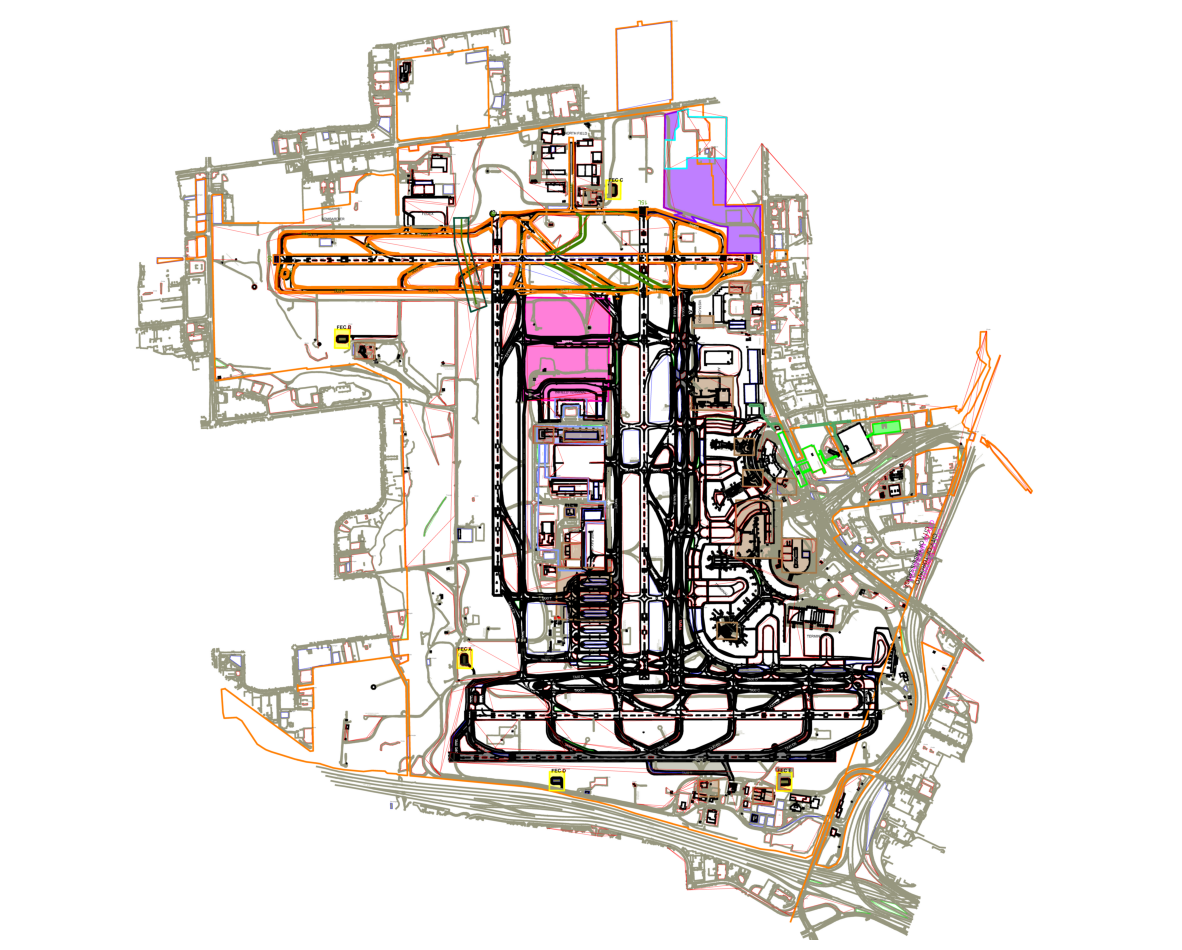

In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt  # Import for display

# Load an image
file_path = r"C:\Users\twool\Downloads\GTAA_ungeoreferenced.tif"  # Ensure correct file path
img = cv2.imread(file_path)

if img is None:
    raise ValueError("Error loading image. Check file path.")

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply edge detection
edges = cv2.Canny(gray, 50, 150)

min_area = 1000

# Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(f"Number of contours found: {len(contours)}")

for contour in contours:
    area = cv2.contourArea(contour)

    if min_area > area:
        continue

    # Approximate the contour to reduce the number of points
    epsilon = 0.02 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)

    # Get the number of vertices (corner points)
    num_vertices = len(approx)

    # Draw the shape based on the number of vertices
    if num_vertices == 3:
        shape_name = "Triangle"
        color = (0, 255, 0)  # Green
    elif num_vertices == 4:
        # Use aspect ratio to distinguish between square and rectangle
        x, y, w, h = cv2.boundingRect(approx)
        aspect_ratio = w / float(h)
        shape_name = "Square" if 0.95 <= aspect_ratio <= 1.05 else "Rectangle"
        color = (255, 0, 0)  # Blue
    elif num_vertices > 4:
        shape_name = "Circle"
        color = (0, 0, 255)  # Red
    else:
        continue

    cv2.drawContours(img, [approx], 0, color, 2)

    # Label the shape on the image
    x, y = approx[0][0]
    cv2.putText(img, shape_name, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1)

# Convert from BGR to RGB for Matplotlib display
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image using Matplotlib
plt.figure(figsize=(15, 15))
plt.imshow(img_rgb)
plt.axis('off')  # Hide axes
plt.show()

cv2.waitKey(0)
cv2.destroyAllWindows()


Number of lines found: 4607


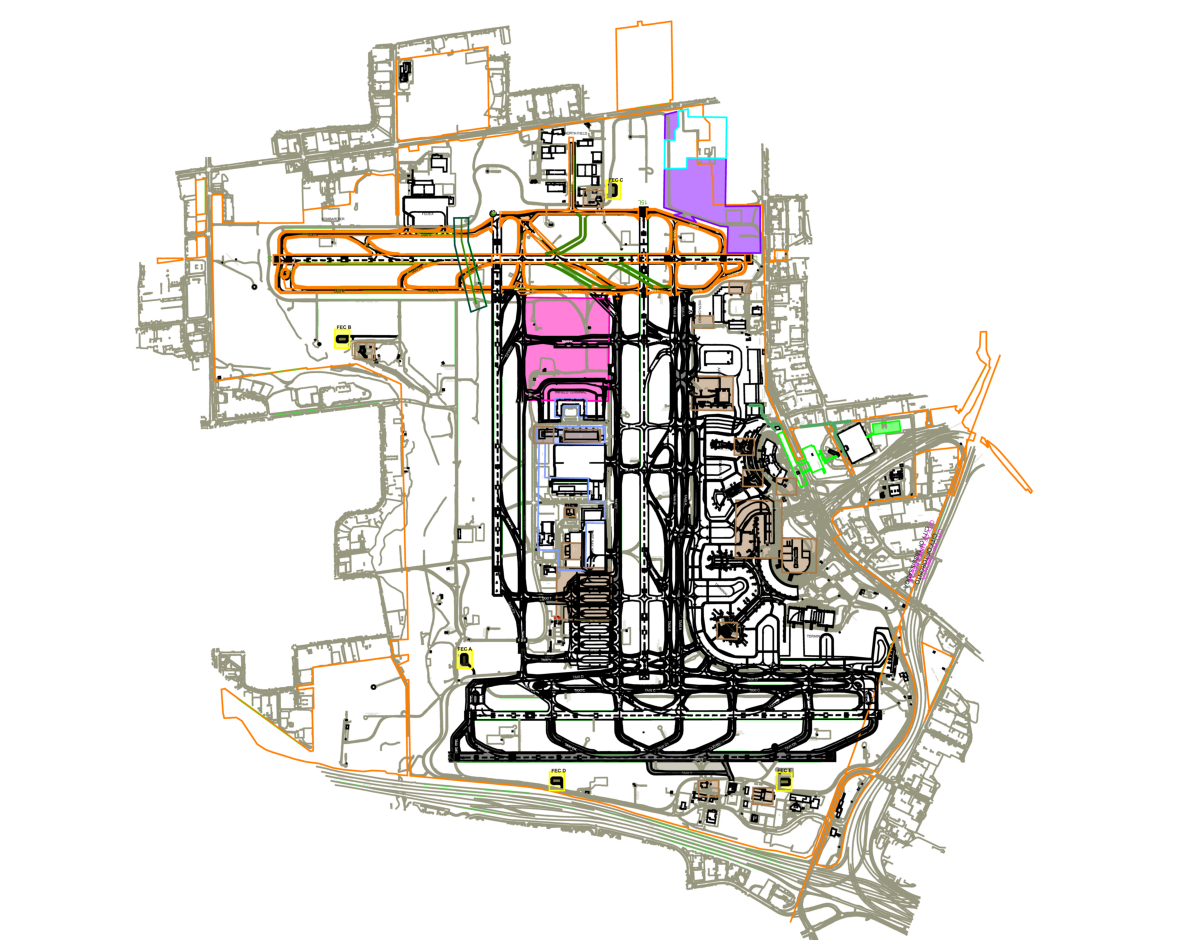

In [39]:
import cv2
import numpy as np
import matplotlib.pyplot as plt  # Import for display

# Load the image
file_path = r"C:\Users\twool\Downloads\GTAA_ungeoreferenced.tif"  # Ensure correct file path
img = cv2.imread(file_path)

if img is None:
    raise ValueError("Error loading image. Check file path.")

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply edge detection using Canny
edges = cv2.Canny(gray, 50, 150)

# Detect lines using the Hough Line Transform
# Parameters: image, rho (distance resolution), theta (angle resolution), threshold
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 100, minLineLength=50, maxLineGap=10)

min_line_length = 350
print(f"Number of lines found: {len(lines)}")

# Draw the detected lines on the original image
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]

        # Calculate the length of the line
        line_length = np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

        # Only draw lines that are longer than the minimum length
        if line_length > min_line_length:
            cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Red line

# Convert from BGR to RGB for Matplotlib display
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image using Matplotlib
plt.figure(figsize=(15, 15))
plt.imshow(img_rgb)
plt.axis('off')  # Hide axes
plt.show()

cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim

def load_and_preprocess(image_path, rotate_angle=0):
    """Load image, convert to grayscale, resize, and optionally rotate."""
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Error loading image: {image_path}")
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.resize(gray, (800, 800))  # Ensuring both images have the same dimensions
    if rotate_angle != 0:
        center = (gray.shape[1] // 2, gray.shape[0] // 2)
        M = cv2.getRotationMatrix2D(center, rotate_angle, 1.0)
        gray = cv2.warpAffine(gray, M, (gray.shape[1], gray.shape[0]))
    return img, gray

def detect_and_match_features(img1, img2, method='ORB'):
    """Detect and match features between two images."""
    if method == 'ORB':
        detector = cv2.ORB_create(nfeatures=500)
        matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    elif method == 'SIFT':
        detector = cv2.SIFT_create()
        matcher = cv2.FlannBasedMatcher(dict(algorithm=1, trees=5), dict(checks=50))
    else:
        raise ValueError("Unsupported feature detection method")
    
    kp1, des1 = detector.detectAndCompute(img1, None)
    kp2, des2 = detector.detectAndCompute(img2, None)
    
    if des1 is None or des2 is None:
        return None, kp1, kp2, []
    
    matches = matcher.match(des1, des2) if method == 'ORB' else matcher.knnMatch(des1, des2, k=2)
    
    if method == 'SIFT':
        good_matches = [m for m, n in matches if m.distance < 0.75 * n.distance]
    else:
        good_matches = matches
    
    matched_img = cv2.drawMatches(img1, kp1, img2, kp2, good_matches[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    return matched_img, kp1, kp2, good_matches

def find_contours(image):
    """Find contours in an image, filtering out small areas."""
    edges = cv2.Canny(image, 50, 200)  # Adjusting Canny thresholds
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return sorted([c for c in contours if cv2.contourArea(c) > 100], key=cv2.contourArea, reverse=True)[:10]  # Lower area threshold

def match_contours(contours1, contours2):
    """Match contours using Hu Moments and Hausdorff distance, selecting best matches."""
    matched_pairs = []
    for c1 in contours1:
        hu1 = cv2.HuMoments(cv2.moments(c1)).flatten()
        min_distance = float('inf')
        best_match = None
        for c2 in contours2:
            hu2 = cv2.HuMoments(cv2.moments(c2)).flatten()
            distance = np.linalg.norm(hu1 - hu2)
            if distance < min_distance:
                min_distance = distance
                best_match = c2
        if best_match is not None and min_distance < 1:
            matched_pairs.append((c1, best_match))
    return matched_pairs

def compute_ssim(img1, img2):
    """Compute structural similarity between two images."""
    img1 = cv2.resize(img1, (800, 800))
    img2 = cv2.resize(img2, (800, 800))
    score, _ = ssim(img1, img2, full=True)
    return score

def visualize_matches(img, title="Feature Matching"):
    plt.figure(figsize=(10, 5))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Load images
satellite_path = r"C:/Users/twool/Downloads/TIFF GTAA Georeferenced/TIFF GTAA Georeferenced/navigation.tif"
cad_path = r"C:\Users\twool\Downloads\GTAA_ungeoreferenced.tif"
img1, gray1 = load_and_preprocess(satellite_path)
img2, gray2 = load_and_preprocess(cad_path)

# Perform multiple rotations of the CAD image (0° to 360° in 5° increments)
for angle in range(0, 360, 10):
    img2_rot, gray2_rot = load_and_preprocess(cad_path, rotate_angle=angle)
    
    # Feature Matching (ORB & SIFT)
    orb_matches, _, _, _ = detect_and_match_features(gray1, gray2_rot, 'ORB')
    sift_matches, _, _, _ = detect_and_match_features(gray1, gray2_rot, 'SIFT')
    
    if orb_matches is not None:
        visualize_matches(orb_matches, f"ORB Feature Matching (Angle {angle}°)")
    if sift_matches is not None:
        visualize_matches(sift_matches, f"SIFT Feature Matching (Angle {angle}°)")
    
# Contour Matching
contours1 = find_contours(gray1)
contours2 = find_contours(gray2)
matched_contours = match_contours(contours1, contours2)
    
contour_img1 = img1.copy()
contour_img2 = img2_rot.copy()
    
# Ensure contours are drawn with high contrast (thicker lines)
for c1, c2 in matched_contours:
    cv2.drawContours(contour_img1, [c1], -1, (0, 0, 255), 3)  # Red color for better visibility
    cv2.drawContours(contour_img2, [c2], -1, (0, 0, 255), 3)  # Red color for better visibility
    
visualize_matches(contour_img1, f"Matched Contours in Satellite Map")
visualize_matches(contour_img2, f"Matched Contours in CAD Map")

# SSIM for Image Similarity (using original gray2)
similarity_score = compute_ssim(gray1, gray2)
print(f"SSIM Similarity Score (Original): {similarity_score:.4f}")


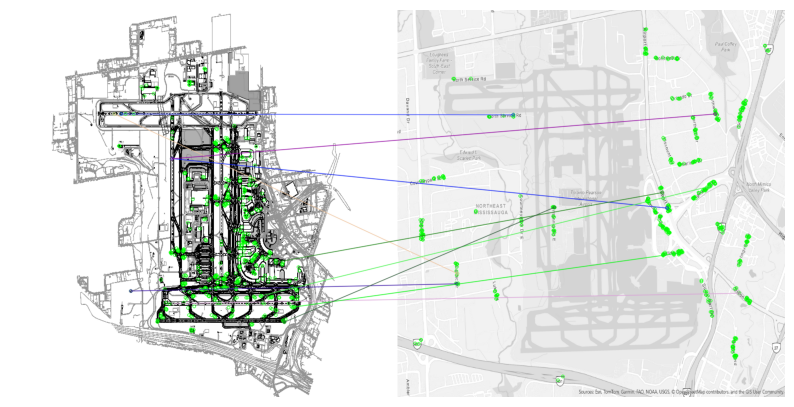

In [213]:
import cv2
import numpy as np
import arcpy

# File paths
cad_img_path = r"C:\Users\twool\Downloads\GTAA_ungeoreferenced.tif"
map_img_path = "C:/Users/twool/Downloads/TIFF GTAA Georeferenced/TIFF GTAA Georeferenced/navigation.tif"  # E


# Step 2: Load images in grayscale
cad_img = cv2.imread(cad_img_path, 0)
map_img = cv2.imread(map_img_path, 0)

cad_img = cv2.resize(cad_img, (800, 800))
map_img = cv2.resize(map_img, (800, 800))

# Step 3: Detect ORB features and compute descriptors
orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(cad_img, None)
kp2, des2 = orb.detectAndCompute(map_img, None)

# Step 4: Match features using BFMatcher
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)

# Step 5: Extract top 10 best matches and their coordinates
src_pts = np.float32([kp1[m.queryIdx].pt for m in matches[:10]]).reshape(-1, 1, 2)
dst_pts = np.float32([kp2[m.trainIdx].pt for m in matches[:10]]).reshape(-1, 1, 2)

M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

# Convert grayscale images to BGR for visualization
cad_img_color = cv2.cvtColor(cad_img, cv2.COLOR_GRAY2BGR)
map_img_color = cv2.cvtColor(map_img, cv2.COLOR_GRAY2BGR)

# Draw the keypoints on both images
cad_img_with_kp = cv2.drawKeypoints(cad_img_color, kp1, None, color=(0, 255, 0))
map_img_with_kp = cv2.drawKeypoints(map_img_color, kp2, None, color=(0, 255, 0))

# Draw matches
img_matches = cv2.drawMatches(cad_img_with_kp, kp1, map_img_with_kp, kp2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(10, 10))  # Larger figure size
plt.imshow(img_matches)
plt.axis('off')  # Hide the axes for a cleaner look
plt.show()


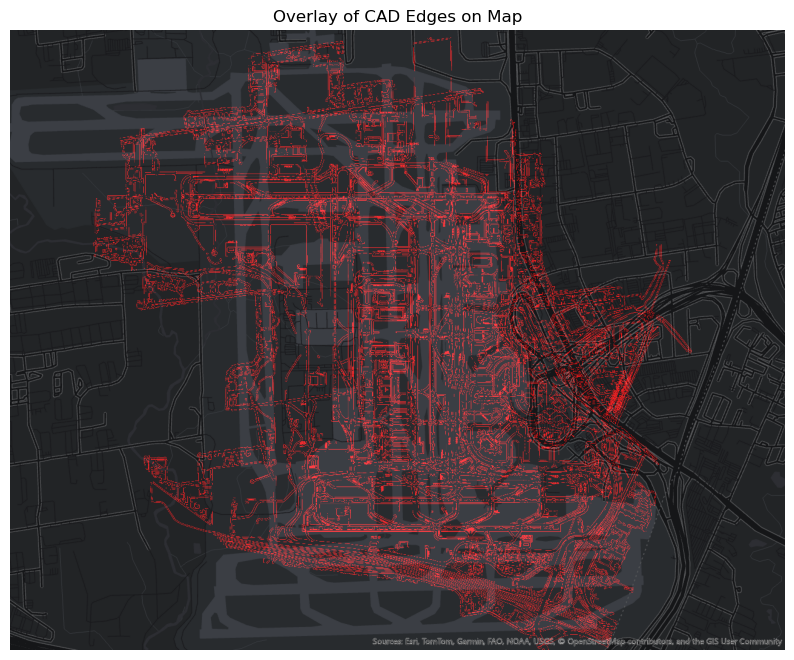

In [174]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

cad_img_path = r"C:\Users\twool\Downloads\GTAA_ungeoreferenced.tif"
map_img_path = "C:/Users/twool/Downloads/TIFF GTAA Georeferenced/TIFF GTAA Georeferenced/darkmap.tif"  # E

# Load the images
map_image = cv2.imread(map_img_path, cv2.IMREAD_COLOR)
cad_drawing = cv2.imread(cad_img_path, cv2.IMREAD_GRAYSCALE)

# Check if images are loaded correctly
if map_image is None or cad_drawing is None:
    print("Error: Could not load one or both images.")
else:
    # Extract edges with Canny
    cad_edges = cv2.Canny(cad_drawing, 50, 150)

    # Increase edge thickness using dilation
    kernel = np.ones((3, 3), np.uint8)
    cad_edges_thick = cv2.dilate(cad_edges, kernel, iterations=2)

    # Resize edges to match the map image size
    cad_edges_resized = cv2.resize(cad_edges_thick, (map_image.shape[1], map_image.shape[0]))

    # Convert edges to a 3-channel image (colorize as red)
    cad_edges_colored = np.zeros_like(map_image)  # Black background
    cad_edges_colored[:, :, 2] = cad_edges_resized  # Assign to red channel

    # Overlay the edges with a stronger alpha value
    alpha = 0.8  # Make CAD lines more visible
    overlay = cv2.addWeighted(map_image, 1, cad_edges_colored, alpha, 0)

    # Convert BGR to RGB for Matplotlib
    overlay_rgb = cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB)

    # Display the overlay
    plt.figure(figsize=(10, 10))
    plt.imshow(overlay_rgb)
    plt.axis('off')
    plt.title("Overlay of CAD Edges on Map")
    plt.show()


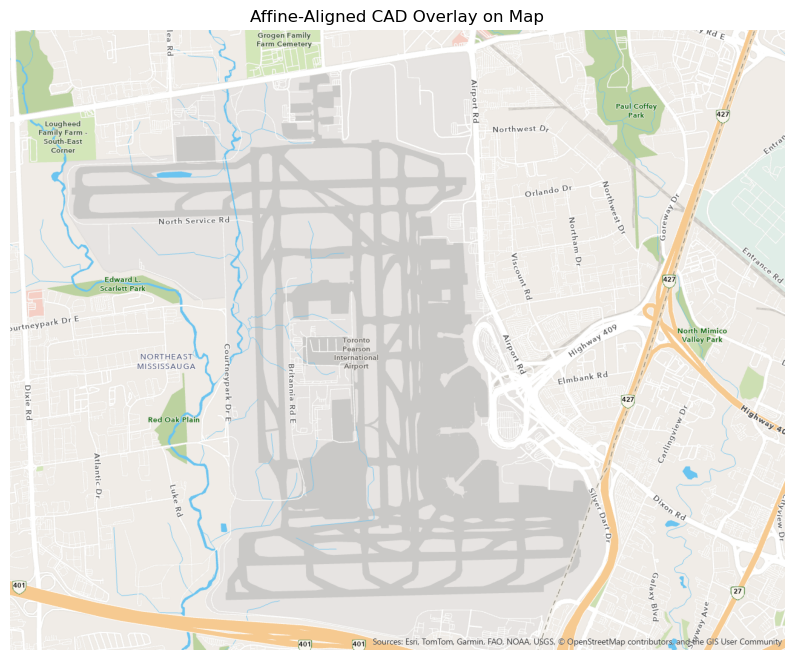

In [156]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

cad_img_path = r"C:\Users\twool\Downloads\GTAA_ungeoreferenced.tif"
map_img_path = "C:/Users/twool/Downloads/TIFF GTAA Georeferenced/TIFF GTAA Georeferenced/community.tif"

# Load images
map_image = cv2.imread(map_img_path, cv2.IMREAD_COLOR)
cad_drawing = cv2.imread(cad_img_path, cv2.IMREAD_GRAYSCALE)

if map_image is None or cad_drawing is None:
    print("Error: Could not load one or both images.")
else:
    # Extract edges from CAD drawing
    cad_edges = cv2.Canny(cad_drawing, 50, 150)

    # Detect keypoints & descriptors using SIFT (better than ORB for this)
    sift = cv2.SIFT_create()
    kp1, des1 = sift.detectAndCompute(cad_edges, None)
    kp2, des2 = sift.detectAndCompute(cv2.cvtColor(map_image, cv2.COLOR_BGR2GRAY), None)

    # Use FLANN-based matcher for SIFT
    index_params = dict(algorithm=1, trees=5)
    search_params = dict(checks=50)
    flann = cv2.FlannBasedMatcher(index_params, search_params)

    matches = flann.knnMatch(des1, des2, k=2)

    # Apply Lowe’s ratio test to filter out weak matches
    good_matches = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:  # Threshold
            good_matches.append(m)

    if len(good_matches) < 10:
        print("Not enough good matches for transformation!")
    else:
        # Extract matched keypoints
        src_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
        dst_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

        # Use Affine transformation instead of Homography
        M, _ = cv2.estimateAffinePartial2D(src_pts, dst_pts)

        # Apply transformation to CAD edges
        cad_edges_warped = cv2.warpAffine(cad_edges, M, (map_image.shape[1], map_image.shape[0]))
        cad_edges_thick = cv2.dilate(cad_edges_warped, kernel, iterations=2)
        # Convert edges to red for overlay
        cad_edges_colored = np.zeros_like(map_image)
        cad_edges_colored[:, :, 2] = cad_edges_thick  # Red edges

        # Blend images
        alpha = 0.7
        overlay = cv2.addWeighted(map_image, 1, cad_edges_colored, alpha, 0)

        # Convert to RGB for Matplotlib
        overlay_rgb = cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB)
        match_img = cv2.drawMatches(cad_edges, kp1, map_image, kp2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

        # Show result
        plt.figure(figsize=(10, 10))
        plt.imshow(overlay_rgb)
        plt.axis('off')
        plt.title("Affine-Aligned CAD Overlay on Map")
        plt.show()
